# Data Rexploration of Common Platform Enumeration (CPE)

* Name: Shinhyuk Park
* CID: 81424121
* Email: spark43@angelo.edu

---

## 1. What is CPE?

**Common platform enumeration (CPE)** is a standardized method used to identify and describe software, hardware, and firmware in a consistent format. It is part of the broader SCAP (security content automation protocol) suite of specifications developed by NIST (national institute of standards and technology). In simple terms, CPE refers to a standardized naming system for IT products and platforms. It helps in identifying software, hardware and operating systems that may be affected by certain vulnerabilities.

## 2. Neo4j Database Connection Using Python Driver

* This code connects to a Neo4j database using the Python Neo4j driver, with authentication details provided (URI, username, and password). The main function, run_query, takes a Cypher query and optional parameters, executes the query in a session with the database, and returns the results as a list of dictionaries.

In [236]:
from neo4j import GraphDatabase
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

uri = "bolt://localhost:7687"       
username = "neo4j"
password = "abcd90909090"

driver = GraphDatabase.driver(uri, auth=(username, password))

def run_query(query, parameters=None):
    with driver.session() as session:
        result = session.run(query, parameters)
        return [record.data() for record in result]

## 3. Rexploration of CPE

### Number of nodes and relationships

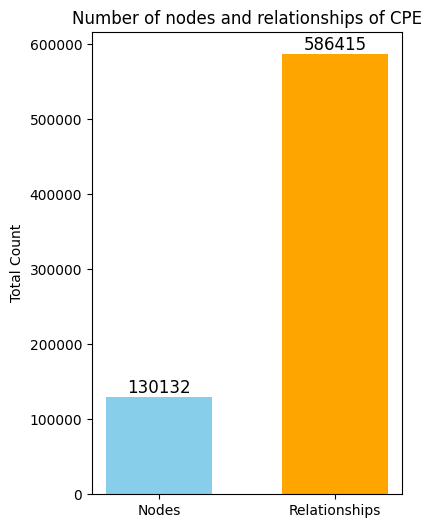

In [237]:
# Total number of CPE
query = """
MATCH (c:UcoexCPE)
RETURN count(c) AS CPE
"""
params = {}

records = run_query(query, parameters=params)

count = records[0]['CPE']

# Total number of relationship regarding CPE
query = """
MATCH (c:UcoexCPE)-[r]-(t)
RETURN count(r) AS Relationship
"""
params = {}

records = run_query(query, parameters=params)

relationship_count = records[0]['Relationship']

# Bar graph to show the result
plt.figure(figsize=(4, 6))

plt.bar(['Nodes', 'Relationships'], [count, relationship_count], color=['skyblue', 'orange'], width=0.6)
plt.ylabel('Total Count')
plt.title(f'Number of nodes and relationships of CPE')
plt.text(0, count + 5, str(count), ha='center', va='bottom', fontsize=12)
plt.text(1, relationship_count + 5, str(relationship_count), ha='center', va='bottom', fontsize=12)
plt.show()

### List of node types and relationships

- Types of CPE

In [238]:
query = """
MATCH (c:UcoexCPE)
RETURN DISTINCT labels(c)
"""
params = {}

records = run_query(query, parameters=params)
df = pd.DataFrame(records)
df

,labels(c)
0,"[Resource, UcoexCPE]"


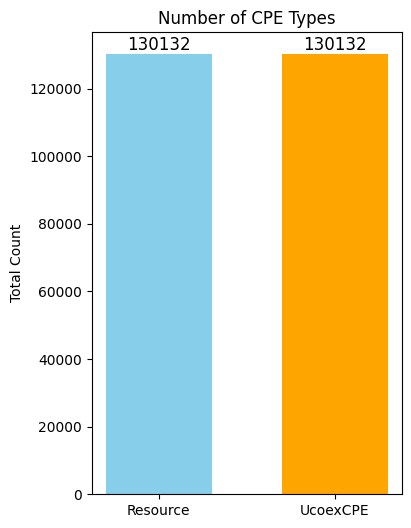

In [239]:
query = """
MATCH (c:UcoexCPE)
WHERE 'Resource' IN labels(c)
RETURN count(c) AS label_count
"""
params = {}

records = run_query(query, parameters=params)
resource_count = records[0]['label_count']

# Bar graph to show the result
plt.figure(figsize=(4, 6))

plt.bar(['Resource', 'UcoexCPE'], [count, resource_count], color=['skyblue', 'orange'], width=0.6)
plt.ylabel('Total Count')
plt.title('Number of CPE Types')
plt.text(0, count + 5, str(count), ha='center', va='bottom', fontsize=12)
plt.text(1, resource_count + 5, str(resource_count), ha='center', va='bottom', fontsize=12)
plt.show()

* Distribution of relationship regarding 'CPE'

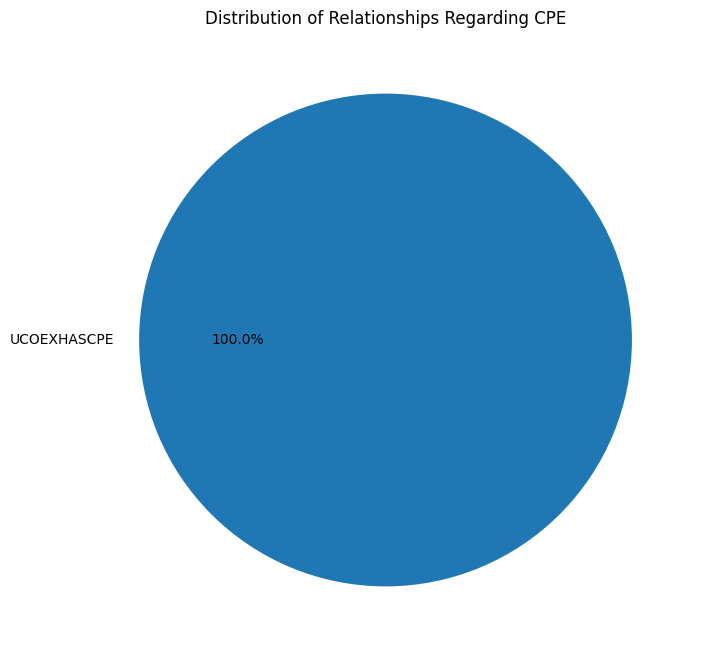

In [240]:
query = """
MATCH (c:UcoexCPE)-[r]-(target)
RETURN DISTINCT labels(c), type(r) AS Relationship, labels(target)
"""
params = {}

records = run_query(query, parameters=params)

df = pd.DataFrame(records)

ax = df['Relationship'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', labeldistance=1.1, figsize=(8,8))
ax.set_ylabel('')
plt.title('Distribution of Relationships Regarding CPE')
plt.show()

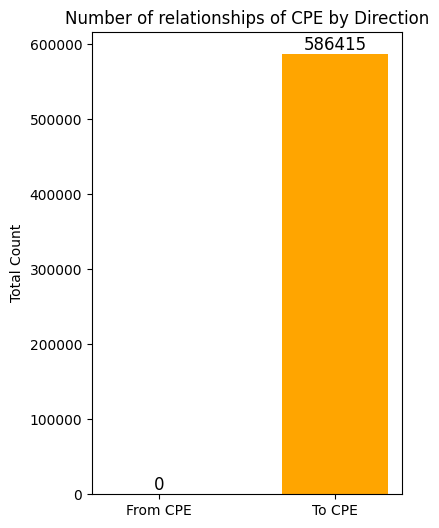

In [241]:
# Total number of relationship emeging from CPE
query = """
MATCH (c:UcoexCPE)-[r]->(target)
RETURN count(r) AS Relationship
"""
params = {}

records = run_query(query, parameters=params)

total_rela_from_CPE = records[0]['Relationship']

# Total number of relationships going to CPE
query = """
MATCH (c:UcoexCPE)<-[r]-(target)
RETURN count(r) AS Relationship
"""
params = {}

records = run_query(query, parameters=params)

total_rela_to_CPE = records[0]['Relationship']

# Bar graph to show the result
plt.figure(figsize=(4, 6))

plt.bar(['From CPE', 'To CPE'], [total_rela_from_CPE, total_rela_to_CPE], color=['skyblue', 'orange'], width=0.6)
plt.ylabel('Total Count')
plt.title(f'Number of relationships of CPE by Direction')
plt.text(0, total_rela_from_CPE + 5, str(total_rela_from_CPE), ha='center', va='bottom', fontsize=12)
plt.text(1, total_rela_to_CPE + 5, str(total_rela_to_CPE), ha='center', va='bottom', fontsize=12)
plt.show()

### Relationships to other datasets

In [242]:
query = """
MATCH (c:UcoexCPE)<-[r:UCOEXHASCPE]-(target)
RETURN labels(c) AS CPE, r AS Relationship, labels(target) LIMIT 10
"""
params = {}

records = run_query(query, parameters=params)
df = pd.DataFrame(records)
df

,CPE,Relationship,labels(target)
0,"[Resource, UcoexCPE]","({}, UCOEXHASCPE, {})","[Resource, UcoCVE]"
1,"[Resource, UcoexCPE]","({}, UCOEXHASCPE, {})","[Resource, UcoCVE]"
2,"[Resource, UcoexCPE]","({}, UCOEXHASCPE, {})","[Resource, UcoCVE]"
3,"[Resource, UcoexCPE]","({}, UCOEXHASCPE, {})","[Resource, UcoCVE]"
4,"[Resource, UcoexCPE]","({}, UCOEXHASCPE, {})","[Resource, UcoCVE]"
5,"[Resource, UcoexCPE]","({}, UCOEXHASCPE, {})","[Resource, UcoCVE]"
6,"[Resource, UcoexCPE]","({}, UCOEXHASCPE, {})","[Resource, UcoCVE]"
7,"[Resource, UcoexCPE]","({}, UCOEXHASCPE, {})","[Resource, UcoCVE]"
8,"[Resource, UcoexCPE]","({}, UCOEXHASCPE, {})","[Resource, UcoCVE]"
9,"[Resource, UcoexCPE]","({}, UCOEXHASCPE, {})","[Resource, UcoCVE]"


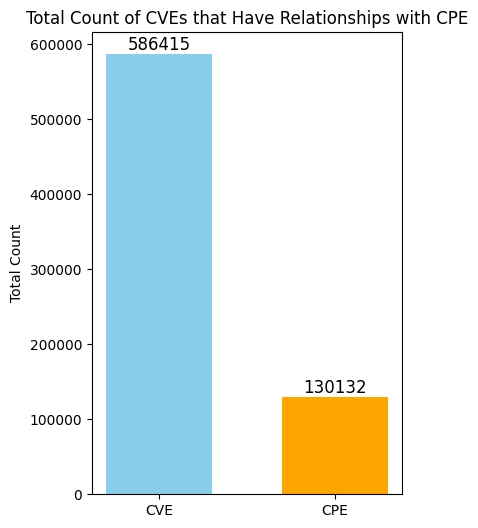

In [243]:
# Total number of relationships going to CPE
query = """
MATCH (c:UcoexCPE)<-[r]-(t:UcoCVE)
RETURN count(t) AS CVE
"""
params = {}

records = run_query(query, parameters=params)

CVE_count = records[0]['CVE']

# Bar graph to show the result
plt.figure(figsize=(4, 6))

plt.bar(['CVE', 'CPE'], [CVE_count, count], color=['skyblue', 'orange'], width=0.6)
plt.ylabel('Total Count')
plt.title('Total Count of CVEs that Have Relationships with CPE')
plt.text(0, CVE_count + 5, str(CVE_count), ha='center', va='bottom', fontsize=12)
plt.text(1, count + 5, str(count), ha='center', va='bottom', fontsize=12)
plt.show()